In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
matches = pd.read_csv('C:/Users/Hp/Desktop/WPL/matches.csv')
deliveries = pd.read_csv('C:/Users/Hp/Desktop/WPL/deliveries.csv')

In [7]:
all_matches = matches[(matches['team1'].isin(['Mumbai Indians', 'Royal Challengers Bangalore'])) & (matches['team2'].isin(['Mumbai Indians', 'Royal Challengers Bangalore']))]

In [4]:
data = pd.merge(matches, deliveries, how = "inner", left_on = 'id', right_on = 'match_id')

In [8]:
sub_data = data[(data['team1'].isin(['Mumbai Indians', 'Royal Challengers Bangalore'])) & (data['team2'].isin(['Mumbai Indians', 'Royal Challengers Bangalore']))]

### Who will win the match??

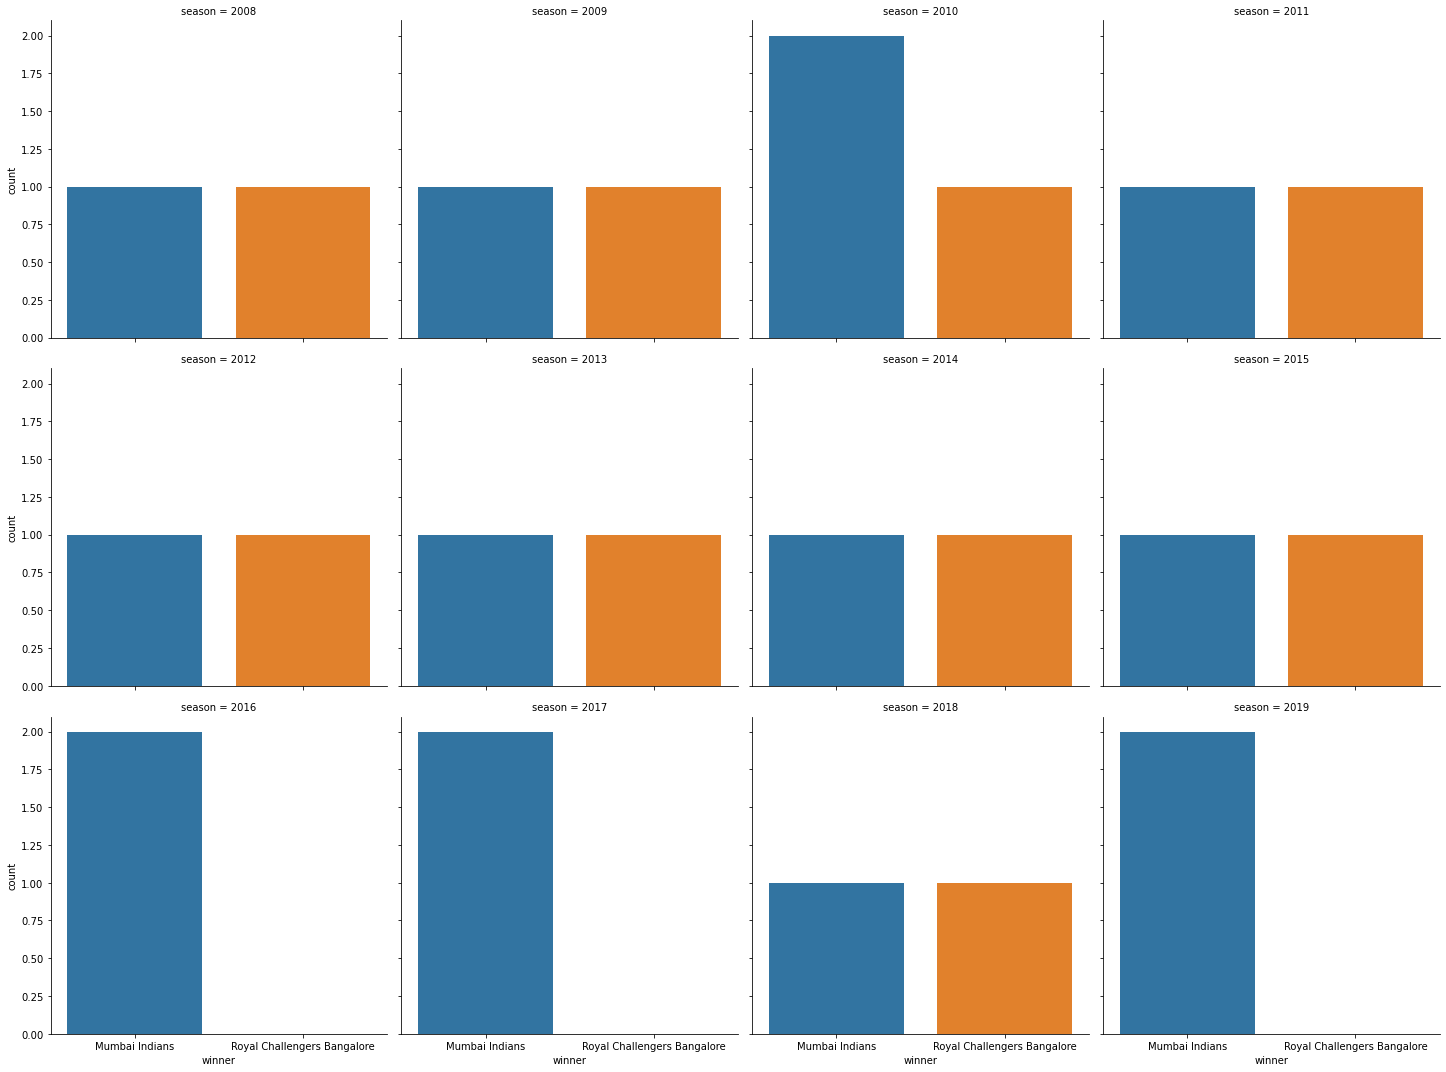

In [11]:
sns.catplot(x='winner', col='season', data=all_matches, kind='count', col_wrap=4)

In [27]:
index1 = all_matches.groupby(['season'])['id'].unique().apply(lambda x : x[0]).tolist()

In [28]:
index2 = all_matches.groupby(['season'])['id'].unique().apply(lambda x : x[1]).tolist()

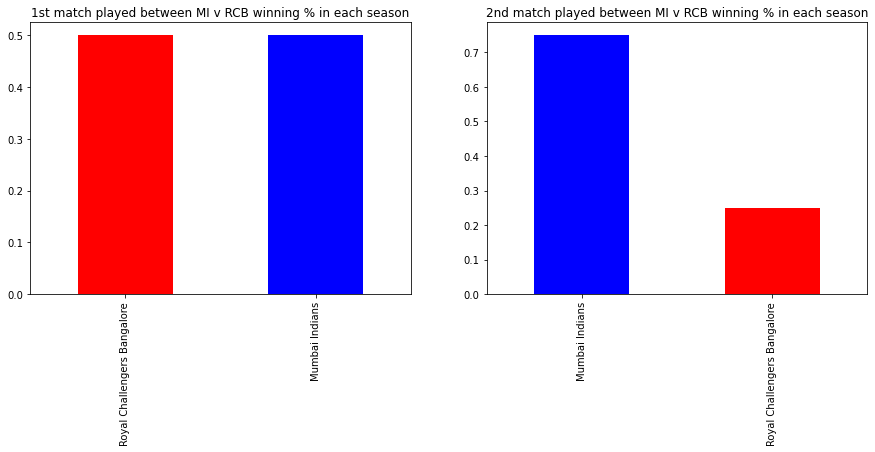

In [31]:
plt.subplot(1, 2, 1)
all_matches[all_matches['id'].isin(index1)]['winner'].value_counts(normalize=True).plot.bar(title='1st match played between MI v RCB winning % in each season', figsize=(15, 5), color=['Red', 'Blue'])

plt.subplot(1, 2, 2)
all_matches[all_matches['id'].isin(index2)]['winner'].value_counts(normalize=True).plot.bar(title='2nd match played between MI v RCB winning % in each season', figsize=(15, 5), color=['Blue', 'Red'])

In [34]:
sub_data1 = all_matches[all_matches['id'].isin(index2)]

In [36]:
sub_data1.groupby('winner')['player_of_match'].value_counts()

winner                       player_of_match
Mumbai Indians               RG Sharma          2
                             AT Rayudu          1
                             CRD Fernando       1
                             DR Smith           1
                             JP Duminy          1
                             KH Pandya          1
                             R McLaren          1
                             SL Malinga         1
Royal Challengers Bangalore  AB de Villiers     1
                             CH Gayle           1
                             TG Southee         1
Name: player_of_match, dtype: int64

In [44]:
sub_data[sub_data['match_id'].isin(index2)].groupby(['match_id', 'batsman'])['batsman_runs'].sum().sort_values(ascending=False).groupby('match_id').head(1)

match_id  batsman       
562       AB de Villiers    133
306       CH Gayle           89
367       AT Rayudu          81
11322     AB de Villiers     76
617       KL Rahul           68
153       AM Rahane          62
484       RG Sharma          59
7924      HH Pandya          59
37        RG Sharma          56
90        ST Jayasuriya      54
417       DR Smith           50
226       AT Rayudu          46
Name: batsman_runs, dtype: int64

In [45]:
sub_data[sub_data['match_id'].isin(index2)].groupby(['match_id', 'bowler'])['player_dismissed'].count().sort_values(ascending=False).groupby('match_id').head(1)

match_id  bowler         
11322     SL Malinga         5
90        CRD Fernando       5
37        MJ McClenaghan     4
417       DS Kulkarni        3
306       DL Vettori         3
153       Harbhajan Singh    3
7924      HH Pandya          3
226       KA Pollard         3
484       Harbhajan Singh    2
367       RP Singh           2
562       HV Patel           2
617       VR Aaron           2
Name: player_dismissed, dtype: int64

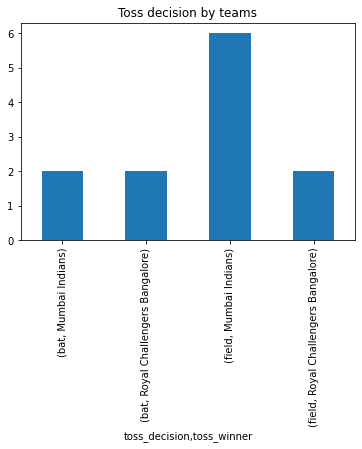

In [48]:
sub_data1.groupby('toss_decision')['toss_winner'].value_counts().plot.bar(title='Toss decision by teams')

In [49]:
pd.crosstab(sub_data1['toss_decision'], sub_data1['winner'])

winner,Mumbai Indians,Royal Challengers Bangalore
toss_decision,,
bat,3,1
field,6,2


### No. of bowlers who will take 2 or more wickets

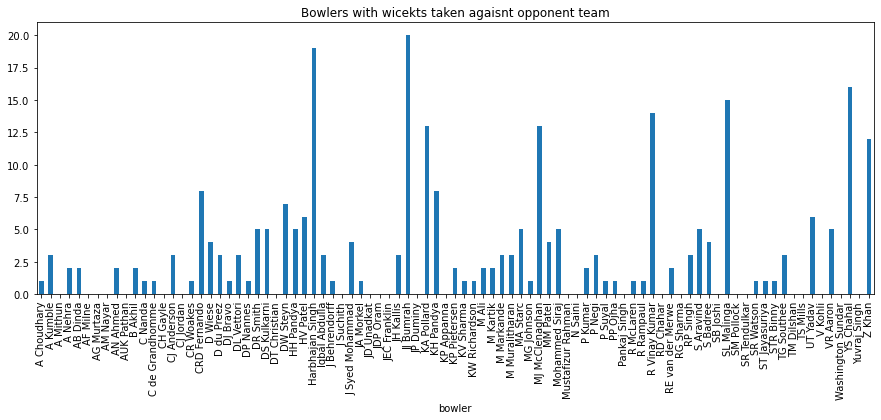

In [54]:
sub_data.groupby('bowler')['player_dismissed'].count().plot.bar(title='Bowlers with wicekts taken agaisnt opponent team', figsize=(15,5))

In [56]:
bowlers = ['JJ Bumrah', 'KA Pollard', 'KH Pandya', 'YS Chahal', 'Mohammed Siraj', 'HH Pandya']

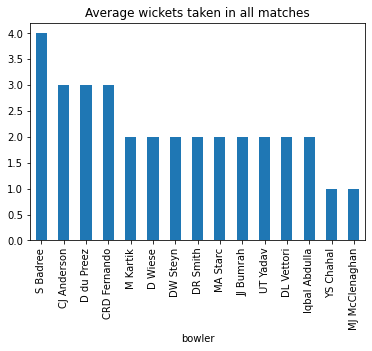

In [68]:
round(sub_data.groupby(['match_id', 'bowler'])['player_dismissed'].count().groupby(['bowler']).mean().sort_values(ascending=False).head(15)).plot.bar(title='Average wickets taken in all matches')

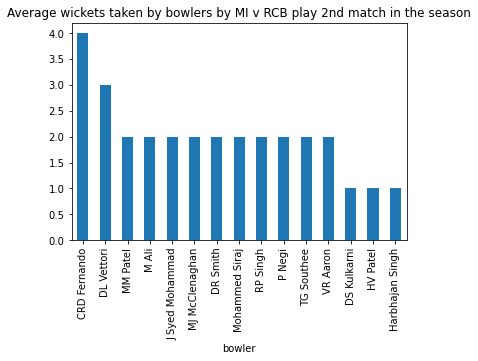

In [67]:
round(sub_data[sub_data['match_id'].isin(index)].groupby(['match_id', 'bowler'])['player_dismissed'].count().groupby(['bowler']).mean().sort_values(ascending=False).head(15)).plot.bar(title='Average wickets taken by bowlers by MI v RCB play 2nd match in the season')

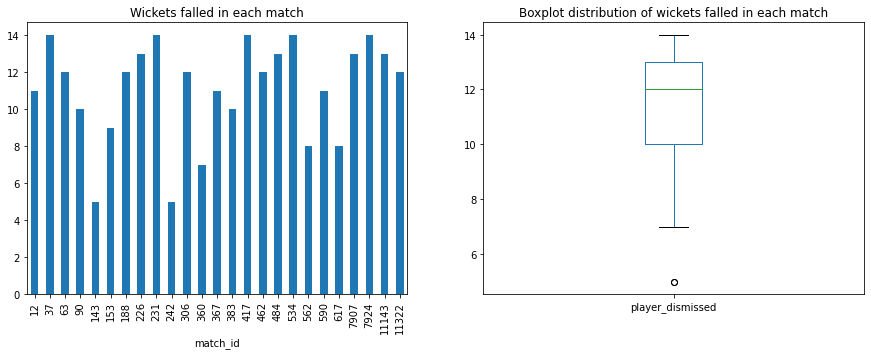

In [74]:
plt.subplot(1, 2, 1)
sub_data.groupby('match_id')['player_dismissed'].count().plot.bar(title='Wickets falled in each match', figsize=(15,5))

plt.subplot(1, 2, 2)
sub_data.groupby('match_id')['player_dismissed'].count().plot.box(title='Boxplot distribution of wickets falled in each match')

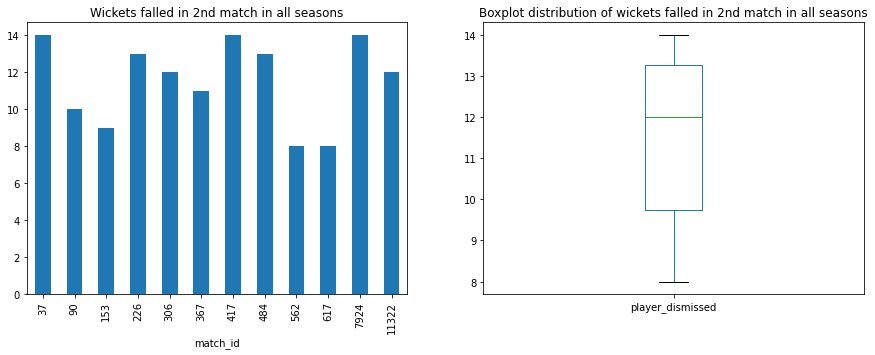

In [77]:
plt.subplot(1, 2, 1)
sub_data[sub_data['match_id'].isin(index2)].groupby('match_id')['player_dismissed'].count().plot.bar(title='Wickets falled in 2nd match in all seasons', figsize=(15,5))

plt.subplot(1, 2, 2)
sub_data[sub_data['match_id'].isin(index2)].groupby('match_id')['player_dismissed'].count().plot.box(title='Boxplot distribution of wickets falled in 2nd match in all seasons')

In [80]:
sub_data[sub_data['match_id'].isin(index2)].groupby(['bowler', 'batsman'])['player_dismissed'].count().sort_values(ascending=False).head(10)

bowler           batsman       
MM Patel         CH Gayle          2
Harbhajan Singh  CH Gayle          2
R Vinay Kumar    KA Pollard        2
Mohammed Siraj   KH Pandya         2
JJ Bumrah        SR Watson         2
KH Pandya        AB de Villiers    2
MJ McClenaghan   V Kohli           2
R Vinay Kumar    RG Sharma         1
                 KD Karthik        1
                 HH Gibbs          1
Name: player_dismissed, dtype: int64

In [108]:
sub_data2 = data[(data['bowler'].isin(['TA Boult', 'CH Morris'])) & (data['batting_team'].isin(['Royal Challengers Bangalore', 'Mumbai Indians']))]

In [113]:
sub_data2.groupby(['bowler', 'batsman'])['player_dismissed'].count().sort_values(ascending=False).head(10)

bowler     batsman       
CH Morris  CH Gayle          3
           KD Karthik        2
           RG Sharma         2
           P Negi            1
           TS Mills          1
TA Boult   AB de Villiers    1
CH Morris  KH Pandya         1
           KA Pollard        1
TA Boult   CJ Anderson       1
CH Morris  N Rana            1
Name: player_dismissed, dtype: int64

In [129]:
dummy = pd.DataFrame(sub_data.groupby(['match_id', 'bowler'])['over'].unique().apply(lambda x : len(x)))
bowl_index = dummy[dummy['over']==1].index
sub_data_copy = sub_data.copy()

In [133]:
for i, j in bowl_index:
    sub_data_copy.drop(sub_data_copy[(sub_data_copy['match_id']==i) & (sub_data_copy['bowler']==j)].index, inplace=True)

In [153]:
bowler_economy = pd.DataFrame(sub_data_copy.groupby(['match_id', 'bowler'])['total_runs'].sum()/sub_data_copy.groupby(['match_id', 'bowler'])['over'].unique().apply(lambda x : len(x)).sort_values(ascending=False))

In [160]:
dummy1 = pd.DataFrame(bowler_economy.groupby(['bowler']).mean())

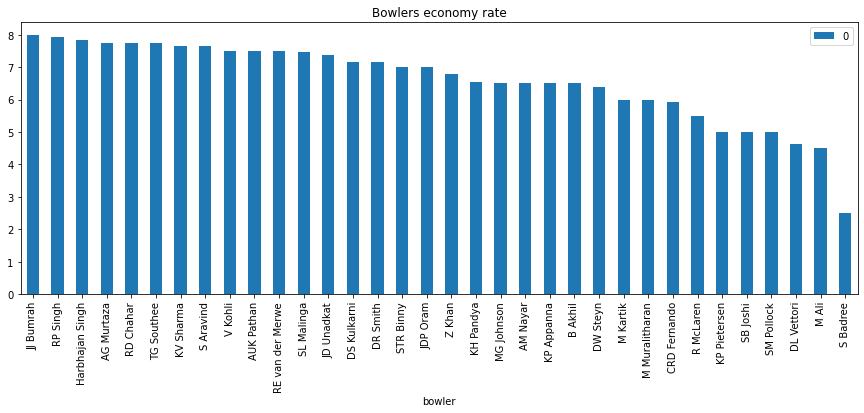

In [166]:
dummy1[dummy1[0]<8].sort_values(by=0, ascending=False).plot.bar(title='Bowlers economy rate', figsize=(15,5))

In [173]:
dummy2 = pd.DataFrame(sub_data.groupby(['match_id', 'batsman'])['ball'].count())
bat_index = dummy2[dummy2['ball']>10].index
sub_data_copy1 = sub_data.copy()

In [175]:
for i, j in bat_index:
    sub_data_copy1.drop(sub_data_copy1[(sub_data_copy1['match_id']==i) & (sub_data_copy1['batsman']==j)].index, inplace=True)

In [183]:
dummy3 = pd.DataFrame(sub_data_copy1[sub_data_copy1['batsman_runs'].isin([4,6])].groupby(['match_id','batsman'])['batsman_runs'].count())

In [185]:
dummy3[dummy3['batsman_runs']>3]

,,batsman_runs
match_id,batsman,
188,Z Khan,4


In [206]:
dummy4 = pd.DataFrame((sub_data_copy1.groupby('batsman')['batsman_runs'].sum()/sub_data_copy1.groupby('batsman')['ball'].count())*100)

In [208]:
dummy4[dummy4[0]>130]

,0
batsman,
BCJ Cutting,200.000000
C de Grandhomme,150.000000
HH Pandya,194.117647
HV Patel,300.000000
Harbhajan Singh,130.555556
Ishan Kishan,190.909091
KB Arun Karthik,150.000000
M Ali,185.714286
MG Johnson,180.000000


### How many runs more/less MI will score in the first 6 overs as compared to RCB??

In [211]:
sub_data4 = sub_data[sub_data['over'].isin([1, 2, 3, 4, 5, 6])]

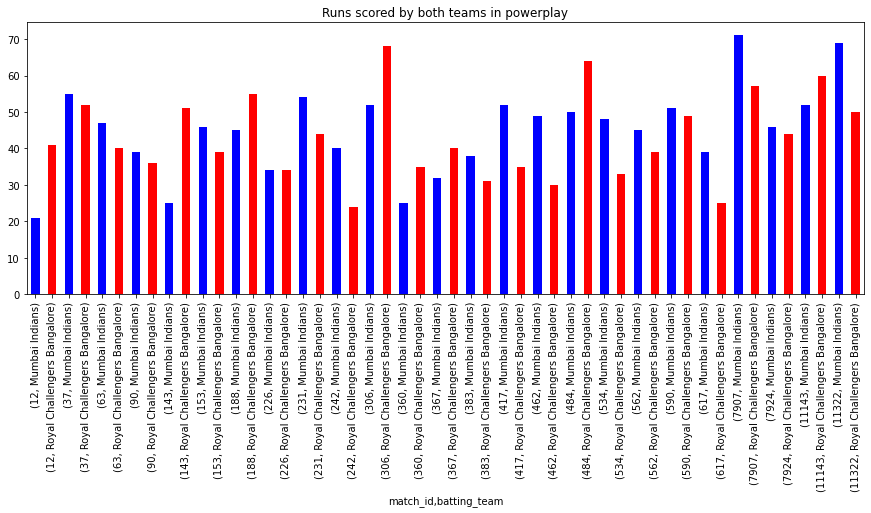

In [215]:
sub_data4.groupby(['match_id', 'batting_team'])['total_runs'].sum().plot.bar(title='Runs scored by both teams in powerplay', figsize=(15, 5), color=['Blue', 'Red'])

In [217]:
sub_data4.groupby(['match_id', 'batting_team'])['total_runs'].sum().groupby('batting_team').describe()

,count,mean,std,min,25%,50%,75%,max
batting_team,,,,,,,,
Mumbai Indians,25.0,45.00,12.048513,21.0,39.0,46.0,52.0,71.0
Royal Challengers Bangalore,25.0,43.04,11.791522,24.0,35.0,40.0,51.0,68.0


In [218]:
sub_data4.groupby(['match_id', 'bowling_team'])['player_dismissed'].count().groupby('bowling_team').describe()

,count,mean,std,min,25%,50%,75%,max
bowling_team,,,,,,,,
Mumbai Indians,25.0,1.28,0.791623,0.0,1.0,1.0,2.0,3.0
Royal Challengers Bangalore,25.0,1.48,1.084743,0.0,1.0,1.0,2.0,4.0


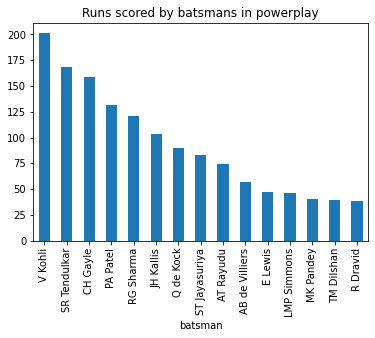

In [222]:
sub_data4.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(15).plot.bar(title='Runs scored by batsmans in powerplay')

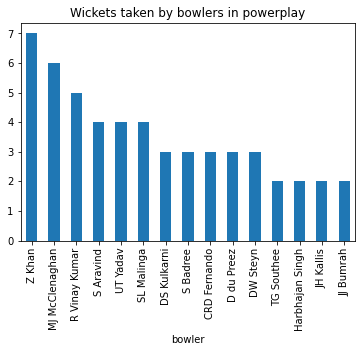

In [223]:
sub_data4.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(15).plot.bar(title='Wickets taken by bowlers in powerplay')